In [3]:
import pandas as pd
print(pd.__version__)

1.4.2


In [4]:
import sklearn
print(sklearn.__version__)

1.0.2


In [5]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [7]:
#!pip install pyarrow


In [8]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [32]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['dur_minutes'] = df['duration'].dt.total_seconds()/60
df = df[(df.dur_minutes >= 1) & (df.dur_minutes <= 120)]

categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)


In [33]:
train_dicts = df[categorical+numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

targets = ['dur_minutes']
y_train = df[targets]

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_train)
mean_squared_error(y_train,y_pred,squared=False)


7.946010390556888

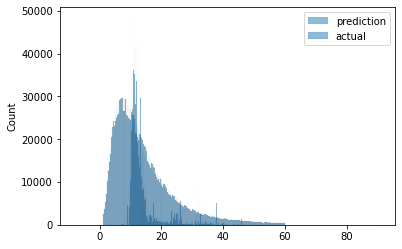

In [34]:
sns.histplot(y_pred,label='prediction')
sns.histplot(y_train,label='actual')

plt.legend()
